# Direct Oral Anticoagulant (DOAC) prescribing during COVID-19

During COVID-19, GPs have been encouraged to switch patients from Warfarin to alternative anticoagulants called Direct Oral Anticoagulants (DOACs) as they require less frequent monitoring and avoid additional visits to the GP practice. DOACs do however require renal function tests to ensure the correct dose is prescribed to avoid harm in patients. This evaluation wants to identify the proportion of patients who are at risk of harm whilst prescribed the incorrect dose of DOAC.

In [3]:
from IPython.display import HTML
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
%matplotlib inline

%config InlineBackend.figure_format='png'

### The number of patients prescribed DOACs since January 2019. 

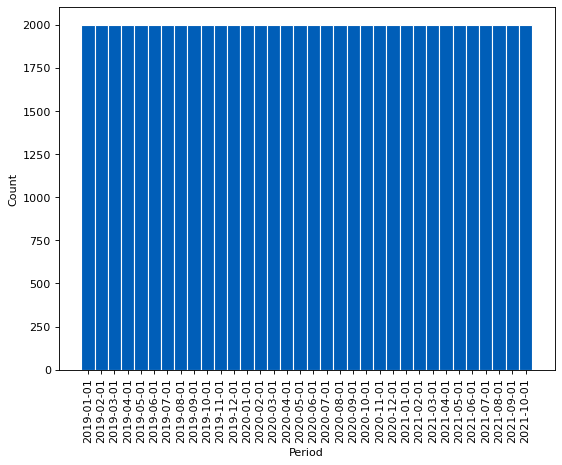

In [4]:
all_df=pd.read_csv("../output/measure_doacs_by_sex.csv", usecols=["date", "on_doac", "population"])
summary_df=all_df.groupby(["date"], as_index=False)["on_doac"].sum()
x1_coordinates=summary_df["date"]
y1_coordinates=summary_df["on_doac"]
plt.figure(figsize=(8,6), dpi=80)
plt.bar(x1_coordinates, y1_coordinates, color='#005EB8', edgecolor='white', width=1)
plt.ylabel('Count')
plt.xlabel('Period')
plt.gca()
plt.xticks(rotation=90)
plt.legend
plt.savefig(f'../output/plot_01_all.png')
plt.show()

### The change in prescribing behaviour related to DOACs since January 2019 broken down by patient demographics 

1. Number of people prescribed a DOAC by region

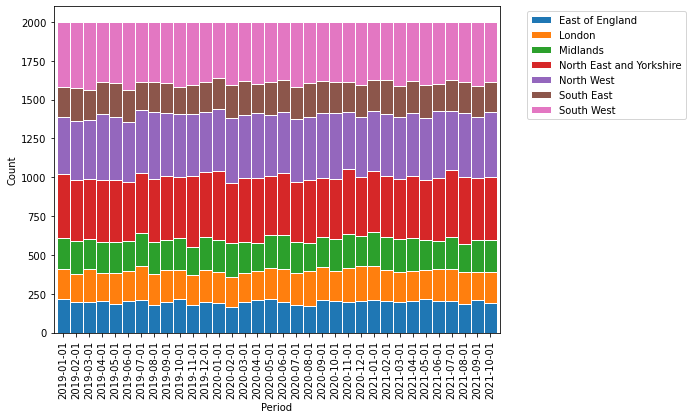

In [5]:
region_df=pd.read_csv("../output/measure_doacs_by_region.csv", usecols=["date", "region", "on_doac", "population"])
region_subset=region_df.loc[region_df["region"] != "missing", :]
pivot_region=region_subset.pivot(index='date', columns='region', values='on_doac')
pivot_region.plot.bar(xlabel='Period', ylabel='Count', stacked='true', edgecolor='white', figsize=(8,6), width=1) 
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.gca()
plt.savefig(f'../output/plot_02_region.png')
plt.show()